<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di un caso reale**:  Telco customer churn

Imposta e realizza un modello predittivo per calcolare il tasso d'abbandono di ciascun cliente usando i dati a disposizione *Telco_customer_churn.csv*,
seguendo i seguenti passi:

- Definire il tipo di problema di apprendimento 
- EDA
- Data preprocessing
- Data Modeling
- Optimization hyperparameter
- Model Evaluation
- Aggiungi delle conclusioni da portare a un ipotetico cliente (che non sa nulla di data science) per convincerlo che il tuo modello predittivo è valido. Inoltre porta qualche esempio di come ne può beneficiare il suo business

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Esercizio extra facoltativo:

Come puoi salvare il modello per riutilizzarlo?



In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 2536)
pd.set_option('display.max_columns', 100)

In [105]:
df = pd.read_csv("Telco_customer_churn.csv")

# Drop all useless columns

useless = ['CustomerID', 'Count', 'Country', 'State', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Churn Label']
df.drop(useless, axis=1, inplace=True)

In [106]:
df.head()

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


In [107]:
df.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [108]:
mapping_colonne = {'Senior Citizen': 'senior',
                   'Tenure Months': 'tenure_months',
                   'Phone Service': 'phone_service',
                   'Multiple Lines': 'multiple_lines',
                   'Internet Service': 'internet_services',
                   'Online Security': 'security',
                   'Online Backup': 'backup',
                   'Device Protection': 'protection',
                   'Tech Support': 'support',
                   'Streaming TV': 'streaming',
                   'Streaming Movies': 'movies',
                   'Paperless Billing': 'paperless_bill',
                   'Payment Method': 'pay_meth',
                   'Monthly Charges': 'monthly_charges',
                   'Total Charges': 'tot_charges',
                   'Churn Value': 'churn_value',
                   'Churn Score': 'churn_score',
                   'Churn Reason': 'churn_reason'
                   }

df = df.rename(columns=mapping_colonne)

# Rinominazione delle colonne in lowercase
df.columns = [colonna.lower() for colonna in df.columns]

<BarContainer object of 20 artists>

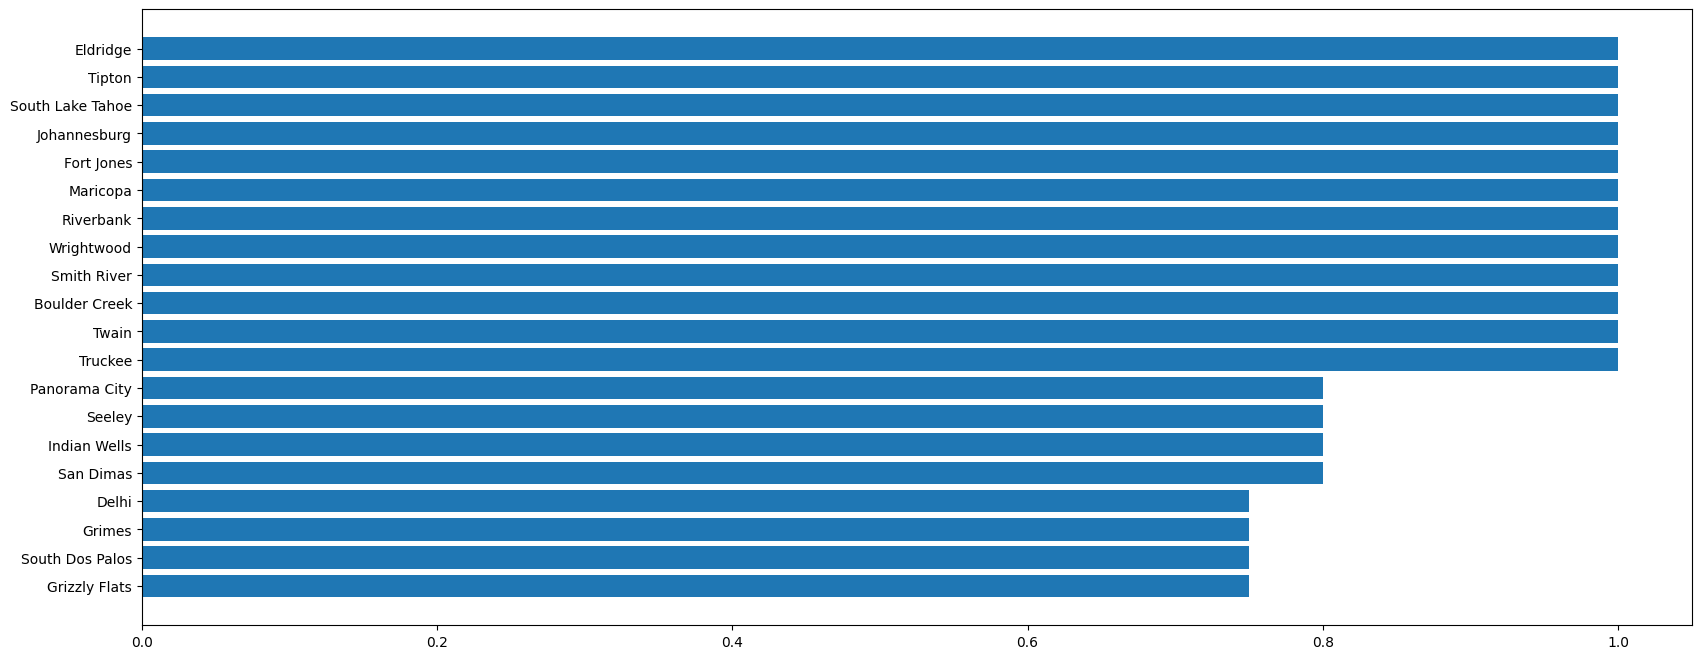

In [109]:
# Let's calculate the churn rate by city
cities_values = df['city'].value_counts().sort_index()
cities_churns = df[['city', 'churn_value']].groupby("city").sum()['churn_value'].sort_index()
cities_churns_rate = cities_churns / cities_values
cities_churns_rate = cities_churns_rate.sort_values()[-20:]

plt.barh(cities_churns_rate.index, cities_churns_rate.values)

So the city can be a parameter to take into consideration in the model

In [110]:
df[['gender', 'churn_value']].groupby("gender").sum()['churn_value'].sort_index()

gender
Female    939
Male      930
Name: churn_value, dtype: int64

<BarContainer object of 2 artists>

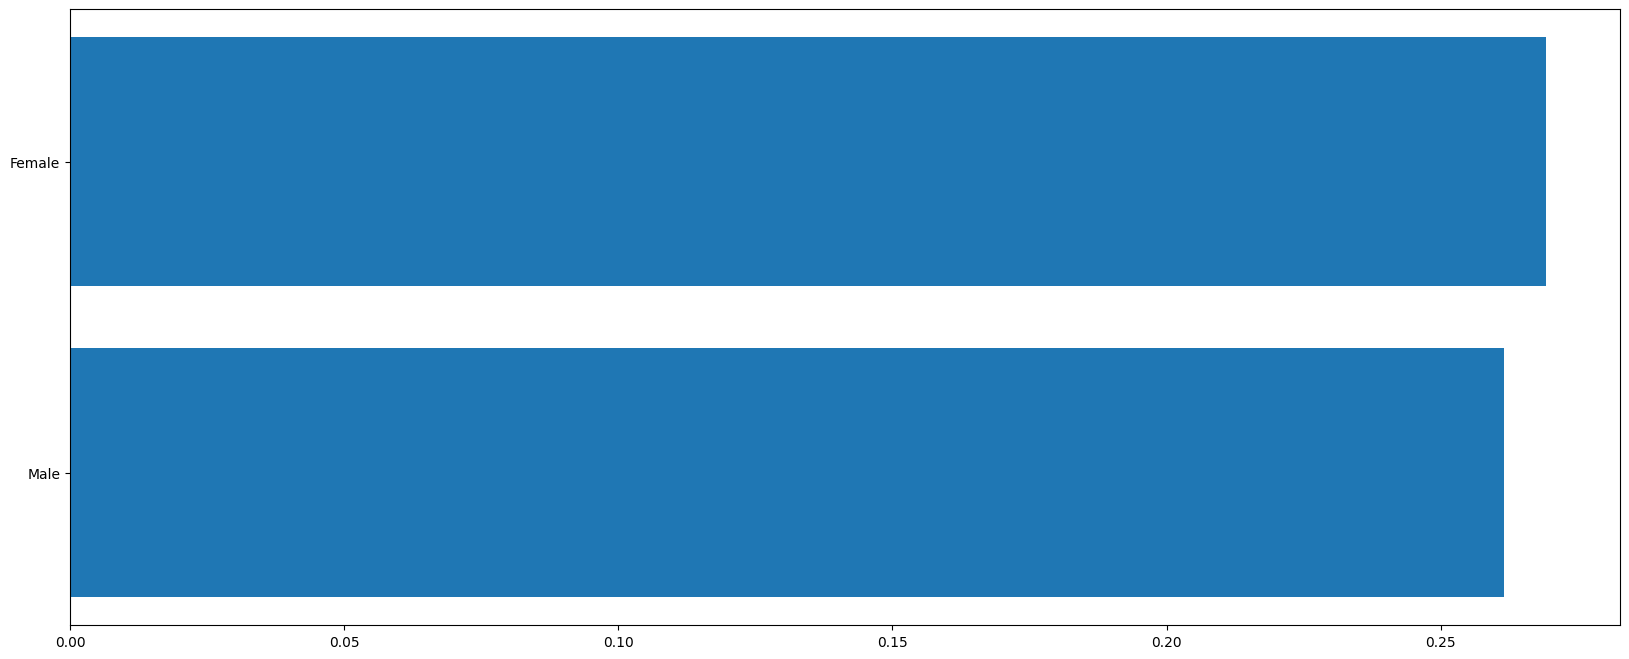

In [111]:
# Let's calculate the churn rate by gender
gender_values = df['gender'].value_counts().sort_index()
gender_churns = df[['gender', 'churn_value']].groupby("gender").sum()['churn_value'].sort_index()
gender_churns_rate = gender_churns / gender_values
gender_churns_rate = gender_churns_rate.sort_values()

plt.barh(gender_churns_rate.index, gender_churns_rate.values)

As we can see the gender isn't a good feature to consider.

So the gender column can be dropped =)

In [112]:
df.drop('gender', axis=1, inplace=True)

<BarContainer object of 2 artists>

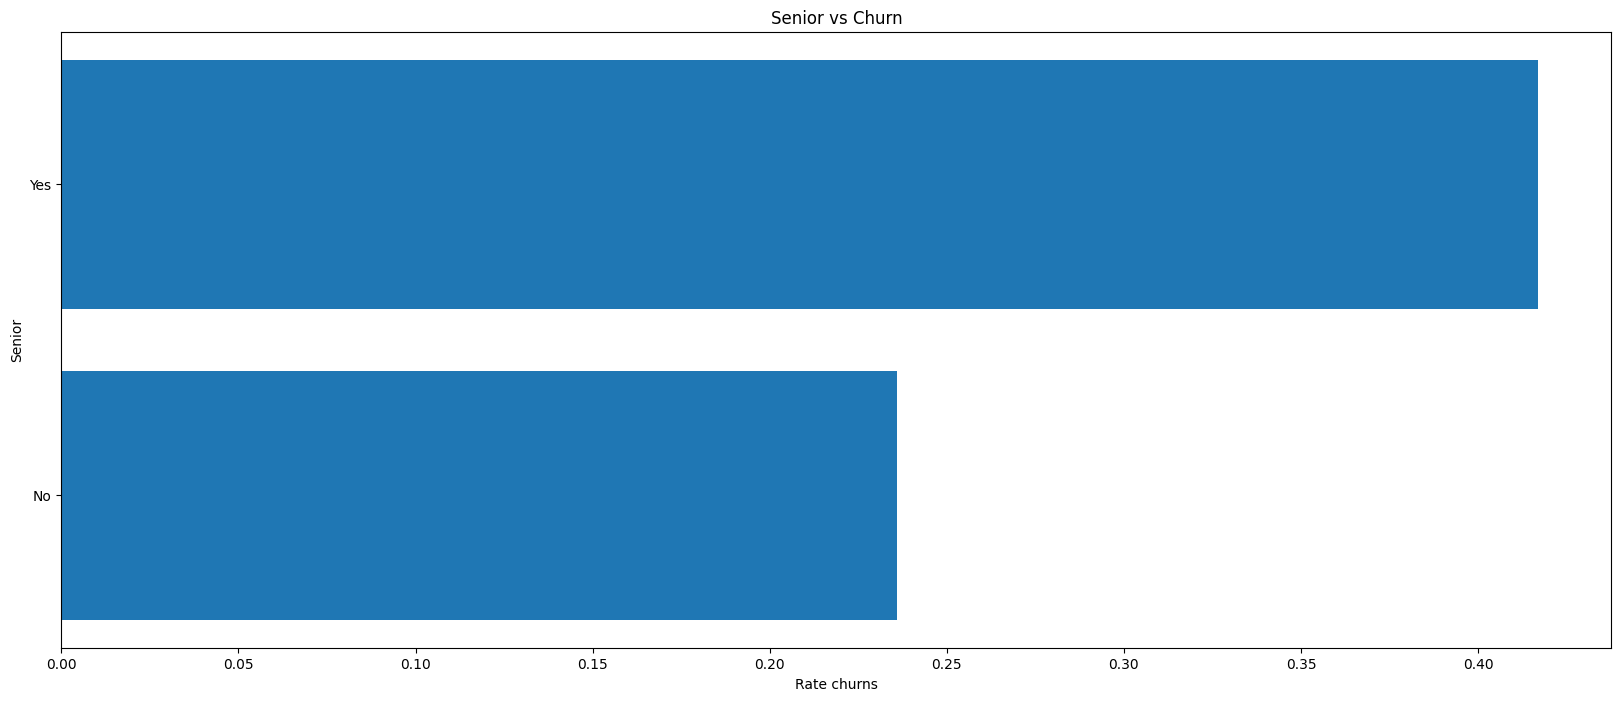

In [113]:
# Let's calculate the churn rate by city
senior_values = df['senior'].value_counts().sort_index()
senior_churns = df[['senior', 'churn_value']].groupby("senior").sum()['churn_value'].sort_index()
senior_churns_rate = senior_churns / senior_values
senior_churns_rate = senior_churns_rate.sort_values()

plt.xlabel("Rate churns")
plt.ylabel("Senior")
plt.title("Senior vs Churn")

plt.barh(senior_churns_rate.index, senior_churns_rate.values)

In [114]:
df.head()

,city,senior,partner,dependents,tenure_months,phone_service,multiple_lines,internet_services,security,backup,protection,support,streaming,movies,contract,paperless_bill,pay_meth,monthly_charges,tot_charges,churn_value,churn_score,cltv,churn_reason
0,Los Angeles,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


<BarContainer object of 2 artists>

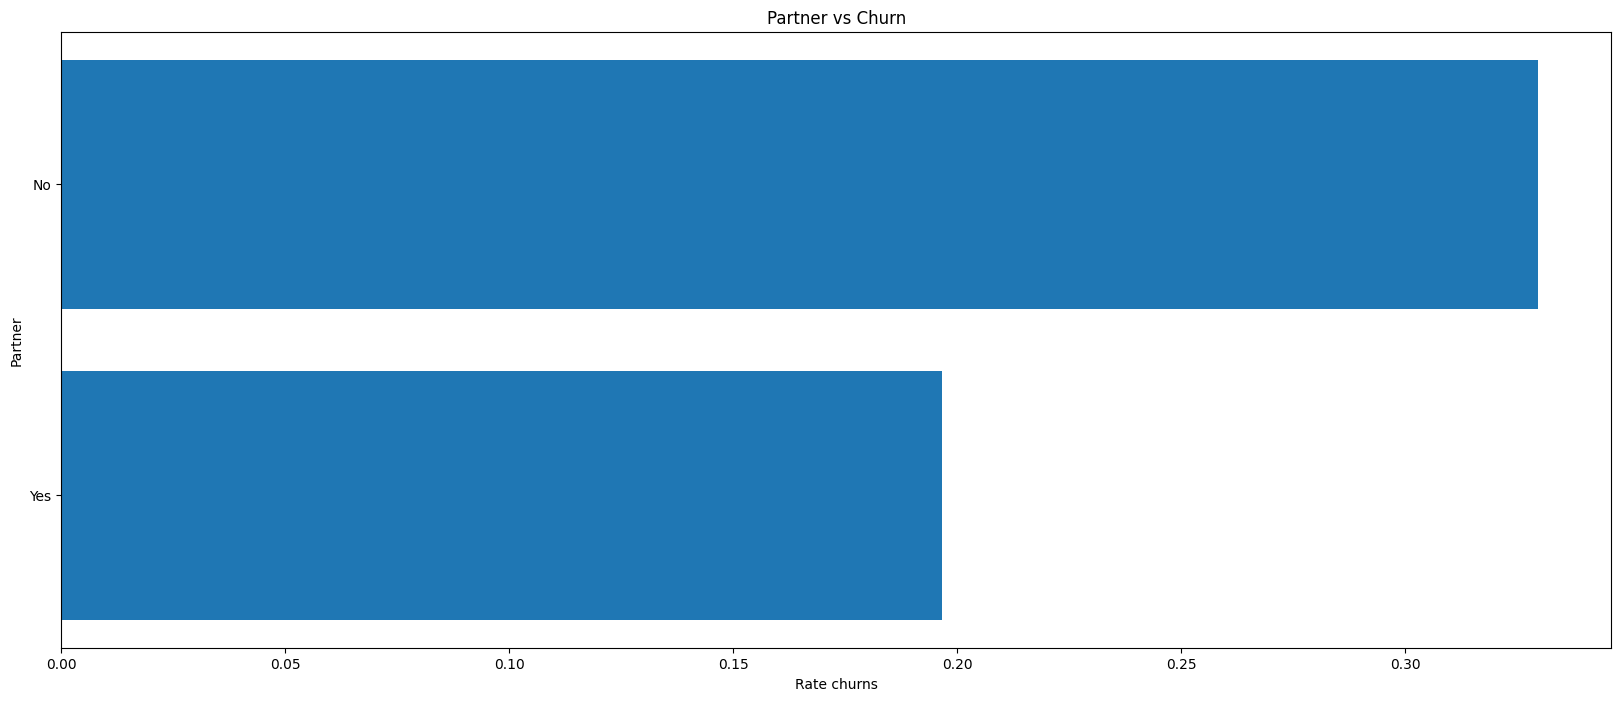

In [115]:
# Let's calculate the churn rate by city
partner_values = df['partner'].value_counts().sort_index()
partner_churns = df[['partner', 'churn_value']].groupby("partner").sum()['churn_value'].sort_index()
partner_churns_rate = partner_churns / partner_values
partner_churns_rate = partner_churns_rate.sort_values()

plt.xlabel("Rate churns")
plt.ylabel("Partner")
plt.title("Partner vs Churn")

plt.barh(partner_churns_rate.index, partner_churns_rate.values)

Verify if there is a correlation between Seniors and Partners

<BarContainer object of 2 artists>

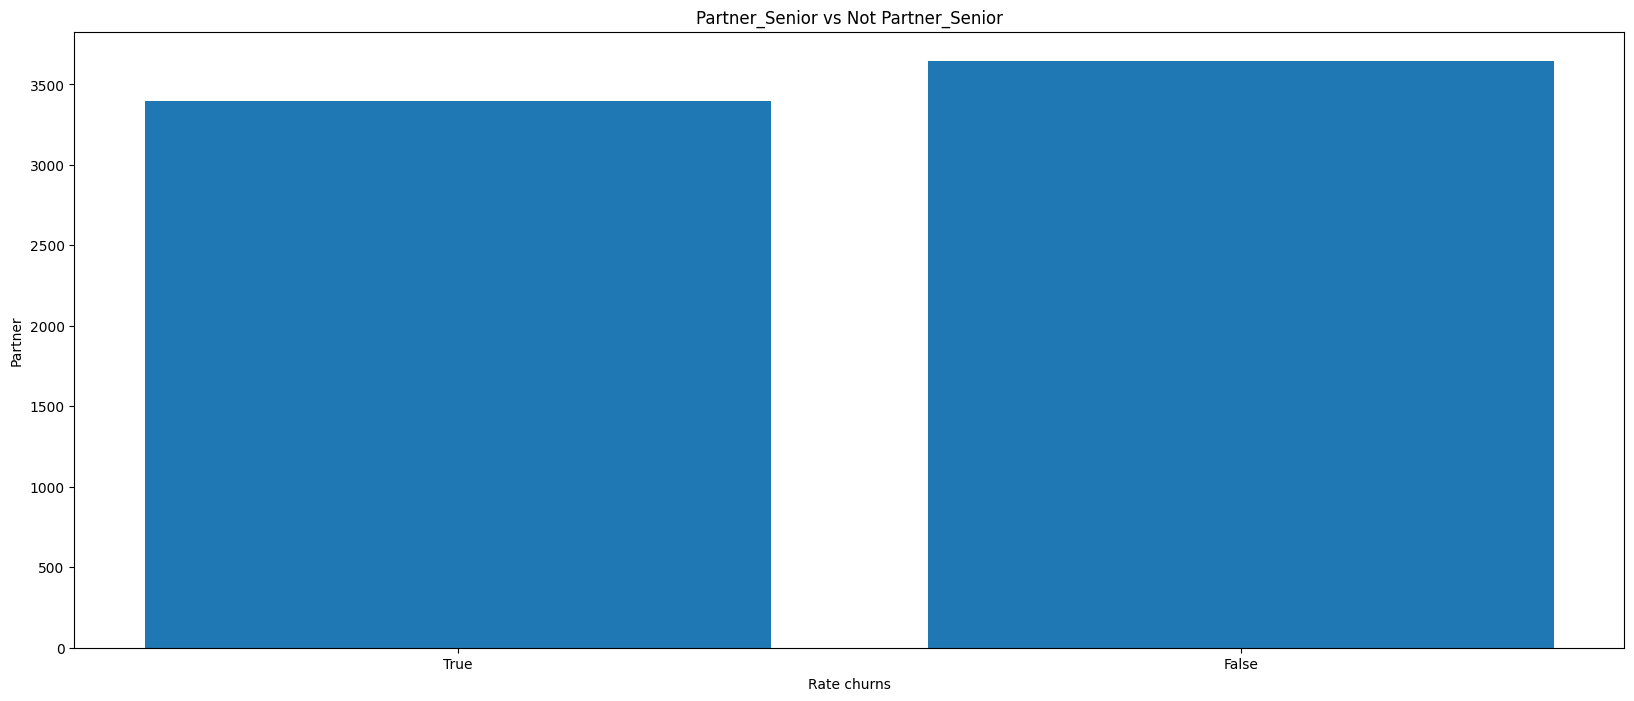

In [116]:
# Let's calculate the correlation between the senior and the partner customers

partner_senior = df['partner'] == df['senior']
partner_senior = partner_senior.value_counts().sort_index()

plt.xlabel("Rate churns")
plt.ylabel("Partner")
plt.title("Partner_Senior vs Not Partner_Senior")

plt.bar(['True', 'False'], partner_senior)

In this plot we can see that the two variables (Partner and Senior aren't correlate, so we can't delete )

In [117]:
df.columns

Index(['city', 'senior', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'internet_services', 'security',
       'backup', 'protection', 'support', 'streaming', 'movies', 'contract',
       'paperless_bill', 'pay_meth', 'monthly_charges', 'tot_charges',
       'churn_value', 'churn_score', 'cltv', 'churn_reason'],
      dtype='object')

<BarContainer object of 2 artists>

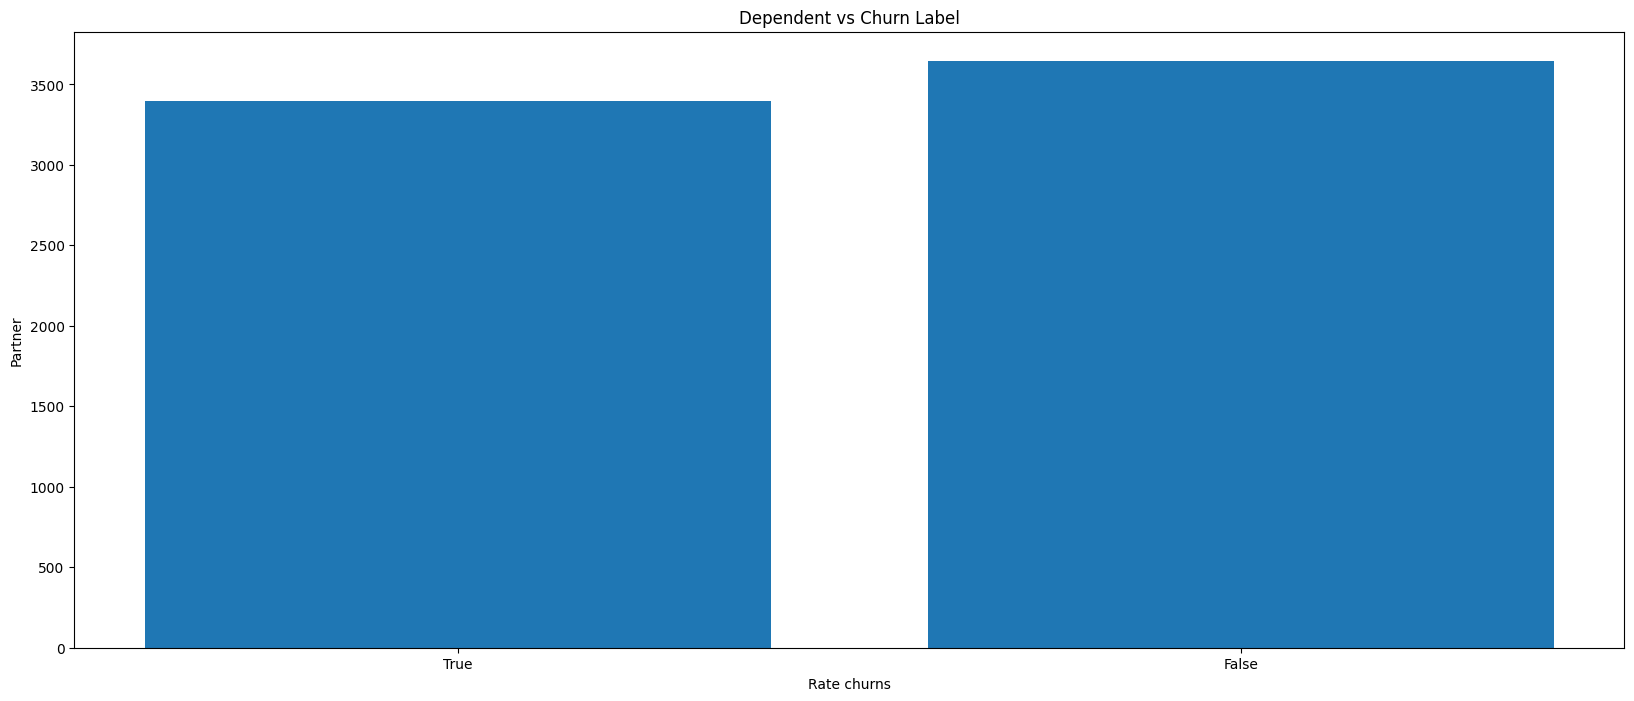

In [118]:
# Let's calculate the correlation between the dependents and the churn values

dependents = df['dependents'].apply(lambda x: 0 if x == 'No' else 1) == df['churn_value']
dependents = dependents.value_counts().sort_index()

plt.xlabel("Rate churns")
plt.ylabel("Partner")
plt.title("Dependent vs Churn Label")

plt.bar(['True', 'False'], partner_senior)

There is not a tangible correlation between the dependent and the target.
But let's investigate deeper.

In [119]:
df.head()

,city,senior,partner,dependents,tenure_months,phone_service,multiple_lines,internet_services,security,backup,protection,support,streaming,movies,contract,paperless_bill,pay_meth,monthly_charges,tot_charges,churn_value,churn_score,cltv,churn_reason
0,Los Angeles,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


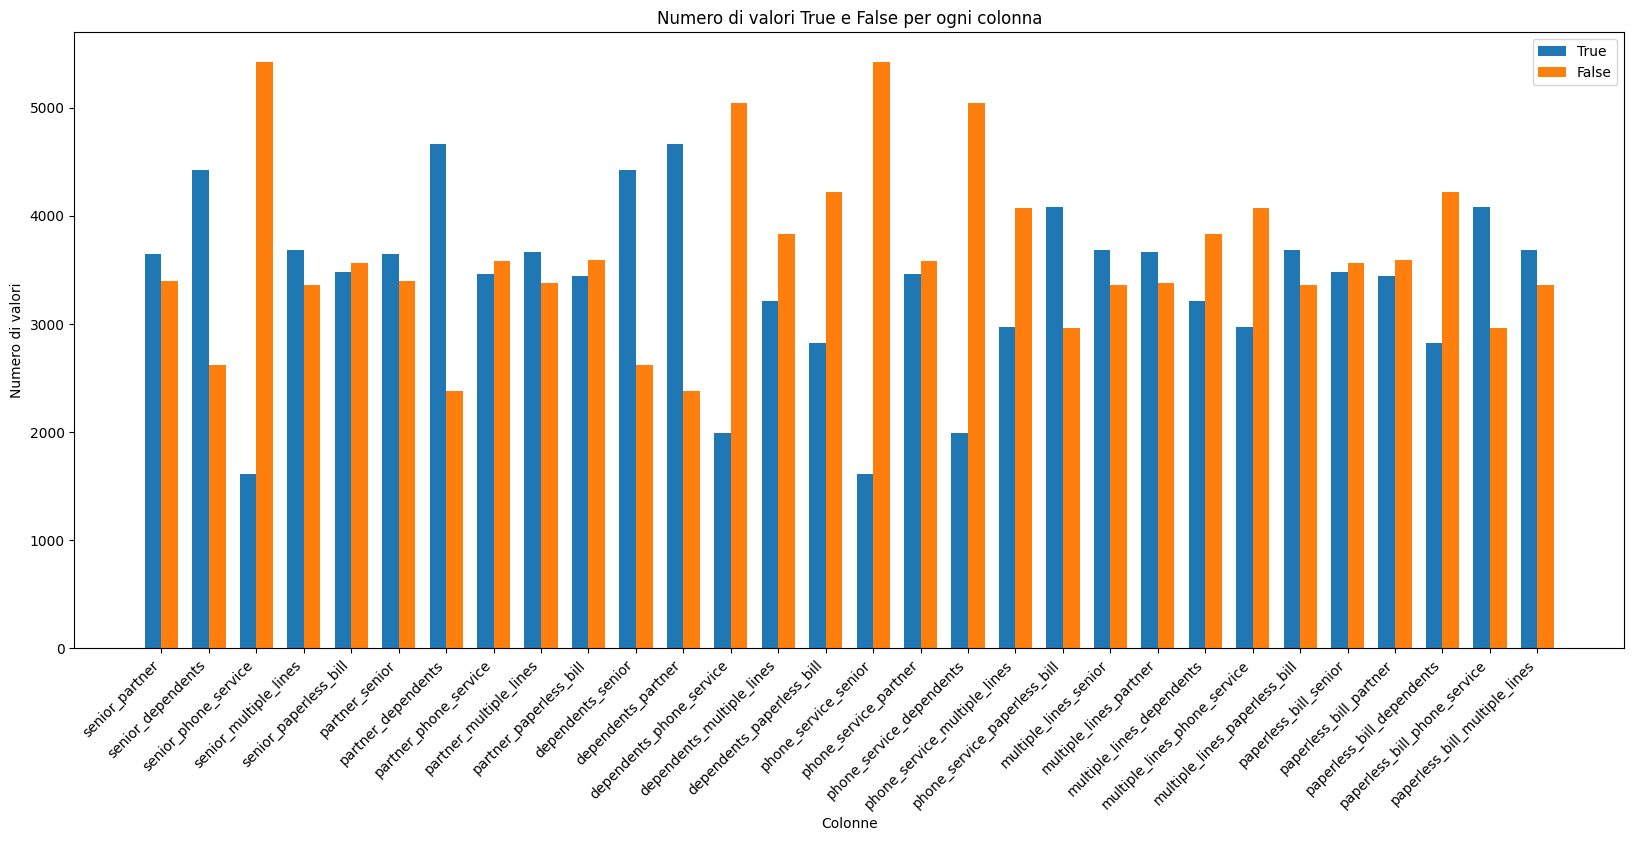

In [120]:
# Creo un dataframe con i valori di correlazione tra le varie features
df_tmp = pd.DataFrame()
for x in ['senior', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'paperless_bill']:
    for y in ['senior', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'paperless_bill']:
        if x != y:
            df_tmp[x + '_' + y] = df[x] == df[y]

# Plot
plt.rcParams['figure.figsize'] = (20.0, 8.0) # set default size of plots

# Conteggio dei valori True e False per ogni colonna
valori = []
for colonna in df_tmp.columns:
    valori_colonna = df_tmp[colonna].value_counts()
    valori.append(valori_colonna)

# Creazione del grafico a barre
bar_width = 0.35
x_pos1 = np.arange(len(df_tmp.columns))
x_pos2 = [x + bar_width for x in x_pos1]

plt.bar(x_pos1, [valori[i][True] for i in range(len(valori))], 
        width=bar_width, label='True')
plt.bar(x_pos2, [valori[i][False] for i in range(len(valori))], 
        width=bar_width, label='False')

plt.xlabel("Colonne")
plt.ylabel("Numero di valori")
plt.title("Numero di valori True e False per ogni colonna")
plt.xticks(x_pos1 + bar_width / 2, df_tmp.columns, rotation=45, horizontalalignment='right')
plt.legend()

plt.show()

### Data preprocessing

Encode all categorical feature

In [121]:
df.head()

,city,senior,partner,dependents,tenure_months,phone_service,multiple_lines,internet_services,security,backup,protection,support,streaming,movies,contract,paperless_bill,pay_meth,monthly_charges,tot_charges,churn_value,churn_score,cltv,churn_reason
0,Los Angeles,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


In [122]:
features = ['city', 'senior', 'partner', 'dependents', 'tenure_months',
       'phone_service', 'multiple_lines', 'internet_services', 'security',
       'backup', 'protection', 'support', 'streaming', 'movies', 'contract',
       'paperless_bill', 'pay_meth', 'monthly_charges', 'tot_charges']

cat_features = ['city', 'senior', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_services', 'security',
                     'backup', 'protection', 'support', 'streaming', 'movies', 'contract',
                     'paperless_bill', 'pay_meth']
num_features = ['tenure_months', 'monthly_charges', 'tot_charges']

target = ['churn_value']

In [123]:
df = df[pd.to_numeric(df['tot_charges'], errors='coerce').notnull()]

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

X_cat = OneHotEncoder(sparse_output=False).fit_transform(df[cat_features])
X_num = MinMaxScaler().fit_transform(df[num_features])
y = OneHotEncoder(sparse_output=False).fit_transform(df[target])

y = y[:, 0]

X = np.concatenate([X_cat, X_num], axis=1)

### Data modeling

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

### Hyperparameter optimization

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logregr = LogisticRegression()

logregr.fit(X_train, y_train)

y_pred = logregr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.56      0.59       537
         1.0       0.86      0.89      0.87      1573

    accuracy                           0.81      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



In [128]:
%%capture
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [5, 10, 100]
}

# definizione del metodo di ricerca migliore combinazione di iper-parametri
grid_search = GridSearchCV(logregr, param_grid=param_grid, cv=5, n_jobs=8)

grid_search.fit(X_val, y_val)

/home/lorenzo/miniconda3/envs/datas/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lorenzo/miniconda3/envs/datas/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

In [129]:
# stampa dei migliori parametri e punteggi ottenuti
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters:  {'C': 1, 'max_iter': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.80
Test set score: 0.81


In [130]:
logregr = LogisticRegression(C=1, max_iter=10, penalty='l1', solver='saga')

logregr.fit(X_train, y_train)

y_pred = logregr.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.57      0.61       537
         1.0       0.86      0.90      0.88      1573

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.81      0.81      0.81      2110



In [131]:
y_pred_prob = logregr.predict_proba(X_test)
y_pred_prob = y_pred_prob * 100

In [132]:
y_pred_prob

array([[63.28922489, 36.71077511],
       [ 2.10467044, 97.89532956],
       [69.02216622, 30.97783378],
       ...,
       [ 0.21971338, 99.78028662],
       [ 1.62090307, 98.37909693],
       [ 2.23245109, 97.76754891]])